<a href="https://colab.research.google.com/github/ueqbe/Hate_speech_detection/blob/main/hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/db/train.csv')
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
def preprocess_text(text):
  text=re.sub(r'\W', ' ', str(text))
  text=re.sub(r'\d+', '', text)
  text=re.sub(r'https?://\S+', '', text)

  tokens=word_tokenize(text)
  stop_words=set(stopwords.words('english'))
  lemmatizer=WordNetLemmatizer()
  filtered_tokens=[lemmatizer.lemmatize(w.lower()) for w in tokens if w.lower() not in stop_words]

  return ' '.join(filtered_tokens)

In [ ]:
df['processed_text']=df['tweet'].apply(preprocess_text)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,processed_text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c_g_anderson viva_based look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


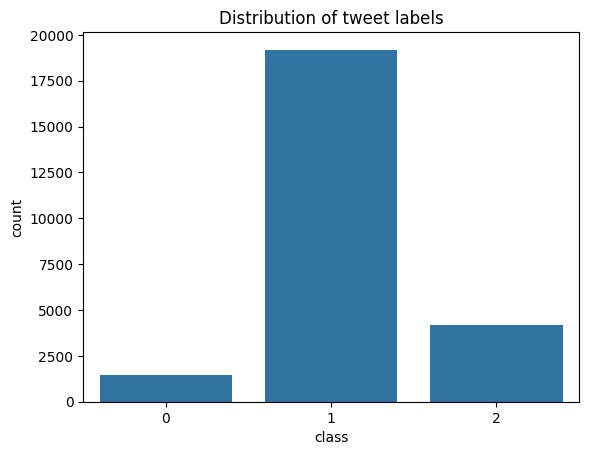

In [ ]:
# @title Exploratory Data Analysis (EDA)

sns.countplot(x='class', data=df)
plt.title('Distribution of tweet labels')
plt.show()

In [ ]:
# @title Feature extraction using TF-IDF vectorization
tfidf_vectorizer=TfidfVectorizer(max_features=1000)
X=tfidf_vectorizer.fit_transform(df['processed_text'])
y=df['class']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm_model=SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [ ]:
print("Accuracy:",accuracy)
print("Classification report:", classification_rep)

Accuracy: 0.8125882590276376
Classification report:               precision    recall  f1-score   support

           0       0.23      0.66      0.34       290
           1       0.98      0.80      0.88      3832
           2       0.79      0.91      0.85       835

    accuracy                           0.81      4957
   macro avg       0.66      0.79      0.69      4957
weighted avg       0.90      0.81      0.84      4957



In [ ]:
def detect_hate_speech(text):
  processed_text=preprocess_text(text)
  text_vectorized=tfidf_vectorizer.transform([processed_text])
  prediction=svm_model.predict(text_vectorized)

  if prediction[0]==1:
    return "This is hate speech"
  else:
    return "This is not hate speech"

text="You ever fuck a bitch and she start to cry? You be confused as shit"
res=detect_hate_speech(text)
print(res)

This is hate speech
